In [2]:
from settings import *

random_rho0s: setting seed=6192


In [3]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

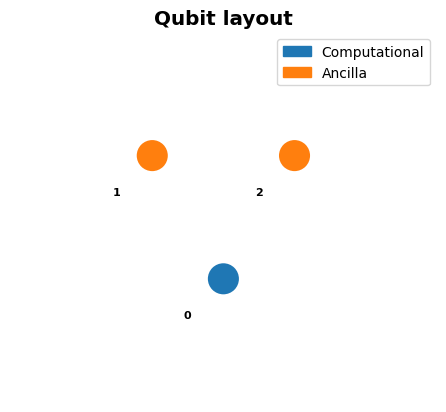

In [4]:
qubits.show_layout()

In [5]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=16120


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.02823395124175454 
            Current gradient: [-8.69297534e-03 -7.63278329e-13 -2.77555756e-13 -3.47063225e-03
 -2.03377286e-02 -2.03377286e-02 -5.54406110e-03  1.95931570e-02
  1.95931570e-02 -6.02745801e-02 -5.54406110e-03  1.95931570e-02
  1.95931570e-02  8.69825450e-03  1.11780571e-02  1.11780571e-02
 -1.93216789e-05  6.17179189e-03  6.17179189e-03 -8.48667899e-02
 -1.93216792e-05  6.17179189e-03  6.17179189e-03 -1.22240561e-02
  2.82339512e-02  2.82339512e-02 -5.68801269e-03 -5.45768485e-03
 -5.45768485e-03 -1.13479605e-02 -5.68801269e-03 -5.45768485e-03
 -5.45768485e-03 -4.83152279e-03  5.68486346e-03  5.68486346e-03
 -1.55781071e-02 -1.04220550e-03 -1.04220550e-03  7.99727747e-03
 -1.55781071e-02 -1.04220550e-03 -1.04220550e-03  4.81806046e-03
  8.18734671e-03  8.18734671e-03 -4.21527380e-03  0.00000000e+00
  0.00000000e+00 -8.63499491e-03] 
            Current error: 0.1199813292493531 
            Current sigma values: (0, 1, 1

In [6]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

rho_rand_haar: seed=78513


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

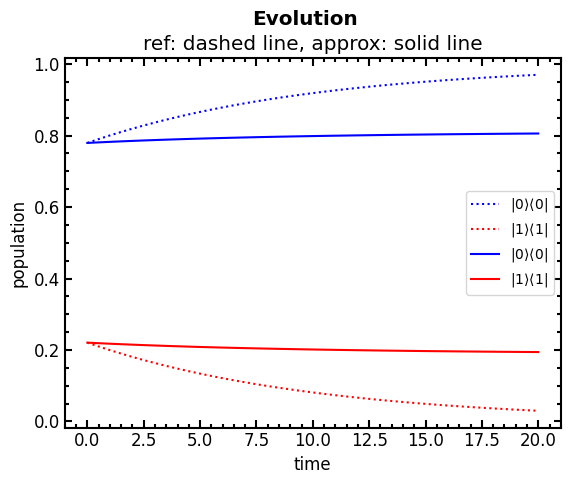

In [11]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

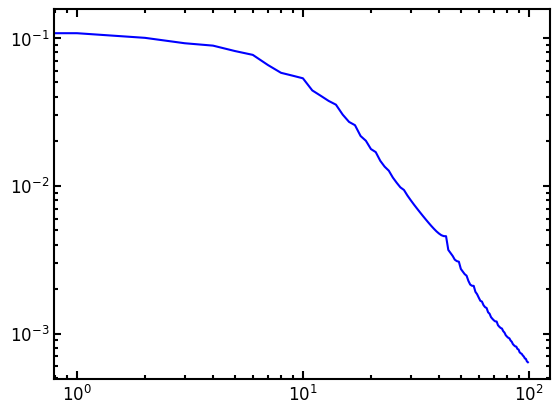

In [8]:
plt.loglog(errors)